# <u>LOAN PREDICTION</u>

## Caso de uso

<img src = 'https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/loanpre-thumbnail-1200x1200.png'>

### Importación de librerías iniciales

In [5]:
import warnings
warnings.filterwarnings("ignore")

#Importar las librerías necesarias en Python.
import pandas as pd      ## Manejo de dataframes o set de datos
import numpy as np       ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats  ## Herramientas y algoritmos matemáticos para python

import seaborn as sns
import matplotlib.pyplot as plt

Usamos una semilla a lo largo de todo el notebook para los procesos aleatorios

In [6]:
seed = 2023

In [7]:
target = 'Loan_Status'

El estado del préstamo puede tener dos valores: Sí o NO. 

Sí: si se aprueba el préstamo 

NO: si no se aprueba el préstamo 

Entonces, al usar el conjunto de datos de entrenamiento, entrenaremos nuestro modelo e intentaremos predecir nuestra columna de destino que es "Loan_Status" en el conjunto de datos de prueba.

### **Lectura Inicial de base de datos**

Utilizaremos las bases de este caso ya preprocesadas en el notebook 1 Procesamiento de datos. Estas bases ya recibieron el siguiente tratamiento previo:

1. División train test 80/20
2. Tratamiento de nulos
3. Labeling de variables
4. Encoding de variables categóricas (dummys)
5. Tratamiento de valores extremos y outliers
6. Creación de nuevas variables
7. Reescalamiento final de la base


In [8]:
train = pd.read_csv('data/train_preprocesed.csv')
test = pd.read_csv('data/test_preprocesed.csv')

In [9]:
# Vemos la dimensionalidad de la base train
train.shape

(491, 19)

In [10]:
# Vemos la dimensionalidad de la base test
test.shape

(123, 19)

In [11]:
# Visualizacion Global de los datos train
train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome,Loan_Status
0,0.000000,0.041586,0.046296,0.094067,0.729730,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.060630,0.092567,0.042180,0.036690,0.211970,0.296906,0
1,0.000000,0.046800,0.000000,0.130246,0.729730,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.016873,0.040946,0.058404,0.098886,0.230720,0.116246,1
2,0.666667,0.651745,0.024336,0.204052,0.729730,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.390230,0.146999,0.091499,0.013618,0.872503,0.737429,0
3,1.000000,0.087040,0.000000,0.150507,0.729730,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.040073,0.001930,0.067489,0.076764,0.346811,0.225431,0
4,0.666667,0.011521,0.026064,0.011577,0.189189,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.022861,0.002538,0.027255,0.042599,0.074347,0.148516,0


In [12]:
# Visualizacion Global de los datos test
test.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome,Loan_Status
0,0.000000,0.062021,0.0000,0.106383,1.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.029159,0.083882,0.010929,0.054989,0.279810,0.119676,1
1,0.000000,0.221089,0.2208,0.306738,0.743590,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.385990,0.420599,0.052520,0.033955,0.569021,0.677390,1
2,0.000000,0.209189,0.0000,0.186170,0.743590,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.181483,0.227620,0.031876,0.042957,0.554557,0.455514,0
3,0.000000,0.100285,0.0000,0.092199,0.743590,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.068764,0.121254,0.015786,0.048193,0.377229,0.238757,0
4,0.333333,0.124588,0.0000,0.024823,0.487179,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.093919,0.063101,0.011840,0.032302,0.426368,0.298821,0


In [13]:
X_train = train.drop(target, axis =1)
y_train = train[target]

X_test = test.drop(target, axis =1)
y_test = test[target]

### Regresion Logistica Binaria

In [14]:
# Paso N°01: Elegimos y entrenamos un algoritmo de ML
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [15]:
#hiperparámetros del modelo estimado
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [16]:
lr.fit(X_train,y_train) # Entrenamiento!

LogisticRegression()

In [17]:
# variables
lr.feature_names_in_

array(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'TotalIncome',
       'TotalIncomeByPerson', 'Cuota', '%Cuota', 'log_ApplicantIncome',
       'log_TotalIncome'], dtype=object)

In [18]:
# coeficientes del modelo
lr.coef_

array([[-0.04440156,  0.0295267 ,  0.42128025,  0.23943876,  0.06403001,
        -3.35971872, -0.0969962 , -0.5471488 ,  0.38906241, -0.02640126,
        -0.87696822, -0.02360208,  0.4424875 ,  0.67822263,  0.66442208,
         0.84031043,  0.05114134, -0.43976352]])

In [19]:
# clases que tenemos
lr.classes_

array([0, 1], dtype=int64)

In [20]:
# Estimaciones de probabilidad. Las estimaciones devueltas para todas las clases están ordenadas por la etiqueta de clases.
# Es decir, la probabilidad que pertenesca a la clase 0 son los valores de la primera columna (indice 0)
# Mientras que la probabilidad de pertenesca a la clase 1 son los valores de la segunda columna (indice 1)
lr.predict_proba(X_test)

array([[0.83692346, 0.16307654],
       [0.05234205, 0.94765795],
       [0.67700855, 0.32299145],
       [0.6705851 , 0.3294149 ],
       [0.81302659, 0.18697341],
       [0.69645025, 0.30354975],
       [0.89769902, 0.10230098],
       [0.68000878, 0.31999122],
       [0.89749454, 0.10250546],
       [0.86966725, 0.13033275],
       [0.90660618, 0.09339382],
       [0.79186287, 0.20813713],
       [0.80304872, 0.19695128],
       [0.81985185, 0.18014815],
       [0.7840191 , 0.2159809 ],
       [0.72763324, 0.27236676],
       [0.77554828, 0.22445172],
       [0.1244913 , 0.8755087 ],
       [0.79682593, 0.20317407],
       [0.8357878 , 0.1642122 ],
       [0.86534438, 0.13465562],
       [0.68851871, 0.31148129],
       [0.76089774, 0.23910226],
       [0.69195701, 0.30804299],
       [0.79992012, 0.20007988],
       [0.80891611, 0.19108389],
       [0.66769027, 0.33230973],
       [0.7340234 , 0.2659766 ],
       [0.78041171, 0.21958829],
       [0.90765961, 0.09234039],
       [0.

In [21]:
lr.predict_proba(X_test)[:,1]   # Predicción de la probabilidad de Loan_Status = 1

array([0.16307654, 0.94765795, 0.32299145, 0.3294149 , 0.18697341,
       0.30354975, 0.10230098, 0.31999122, 0.10250546, 0.13033275,
       0.09339382, 0.20813713, 0.19695128, 0.18014815, 0.2159809 ,
       0.27236676, 0.22445172, 0.8755087 , 0.20317407, 0.1642122 ,
       0.13465562, 0.31148129, 0.23910226, 0.30804299, 0.20007988,
       0.19108389, 0.33230973, 0.2659766 , 0.21958829, 0.09234039,
       0.74635898, 0.95605361, 0.22909558, 0.27089273, 0.36101883,
       0.95136383, 0.89077149, 0.19224921, 0.41202906, 0.77562255,
       0.12481432, 0.32946804, 0.09934919, 0.25810563, 0.35301201,
       0.31307033, 0.4326143 , 0.10953684, 0.21767811, 0.23219972,
       0.92146743, 0.24394796, 0.32308331, 0.83592873, 0.33589647,
       0.09742893, 0.29082661, 0.12740406, 0.88498999, 0.1084246 ,
       0.34860281, 0.28666213, 0.93186433, 0.20028898, 0.52422869,
       0.20620511, 0.21119413, 0.92589451, 0.22440857, 0.40814721,
       0.20186438, 0.20429137, 0.35989982, 0.17020773, 0.42806

In [22]:
lr.predict(X_test)  # Predicción de la categoría

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [23]:
# Paso N°02: Con el algoritmo entrenado predecimos sobre la data de train y test!

y_pred_train=lr.predict(X_train) # Prediccion sobre el train
y_pred_test= lr.predict(X_test) # Prediccion sobre el test

y_proba_test= lr.predict_proba(X_test)[:,1]   #Prediccion de probabilidades del target

In [24]:
# Paso N°03: Revisamos las metricas de validación!
from sklearn import metrics as metrics

In [25]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
VN, FP, FN, VP = metrics.confusion_matrix(y_train,y_pred_train).ravel()

In [26]:
VN

332

In [27]:
FP

5

In [28]:
FN

87

In [29]:
VP

67

In [30]:

def metricas_confusion(y_train,y_pred_train,y_test,y_pred_test):
    # Matriz de confusion
    print("Matriz confusion: Train")
    cm_train = metrics.confusion_matrix(y_train,y_pred_train)
    print(cm_train)

    print("Matriz confusion: Test")
    cm_test = metrics.confusion_matrix(y_test,y_pred_test)
    print(cm_test)

    # Accuracy
    print("Accuracy: Train")
    accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
    print(accuracy_train)

    print("Accuracy: Test")
    accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
    print(accuracy_test)

    # Precision o Aporte del Modelo
    print("Precision: Train")
    precision_train=metrics.precision_score(y_train,y_pred_train)
    print(precision_train)

    print("Precision: Test")
    precision_test=metrics.precision_score(y_test,y_pred_test)
    print(precision_test)

    # Recall o Sensibilidad 
    print("Recall: Train")
    recall_train=metrics.recall_score(y_train,y_pred_train)
    print(recall_train)

    print("Recall: Test")
    recall_test=metrics.recall_score(y_test,y_pred_test)
    print(recall_test)

In [31]:
metricas_confusion(y_train,y_pred_train,y_test,y_pred_test)

Matriz confusion: Train
[[332   5]
 [ 87  67]]
Matriz confusion: Test
[[81  4]
 [21 17]]
Accuracy: Train
0.8126272912423625
Accuracy: Test
0.7967479674796748
Precision: Train
0.9305555555555556
Precision: Test
0.8095238095238095
Recall: Train
0.43506493506493504
Recall: Test
0.4473684210526316


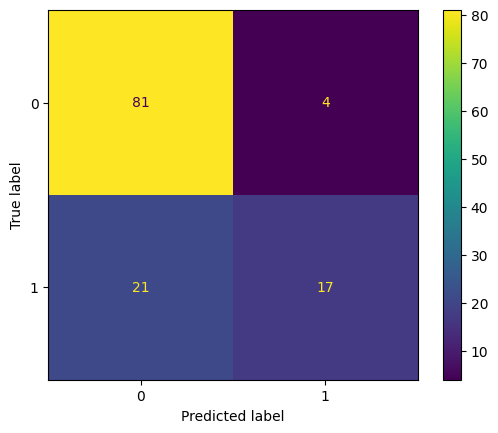

In [32]:
# Mostrando la matriz de confusión para el conjunto de test
cm = metrics.confusion_matrix(y_test,y_pred_test, labels=lr.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr.classes_)
disp.plot()
plt.show()

In [33]:
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.95      0.87        85
           1       0.81      0.45      0.58        38

    accuracy                           0.80       123
   macro avg       0.80      0.70      0.72       123
weighted avg       0.80      0.80      0.78       123



In [34]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(y, y_proba, label = ''):
    '''
    dibujar la curva roc para las probabilidades y target entregados
    
    params:
    y: etiquetas originales
    y_proba: probabilidades resultado del modelo
    '''
    
    auc_roc = roc_auc_score(y, y_proba)
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    
    plt.figure(figsize=(8,6))
    plt.rcParams.update({'font.size': 12})
    plt.plot(fpr, fpr, c = 'red')
    plt.plot(fpr, tpr, label= (f"Curva ROC {label} (AUC = {auc_roc:.4f})"))
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"Curva ROC {label}")
    plt.legend(loc=4, numpoints=1)

In [35]:
# ROC AUC
roc_auc_score(y_test, y_proba_test)

0.7436532507739938

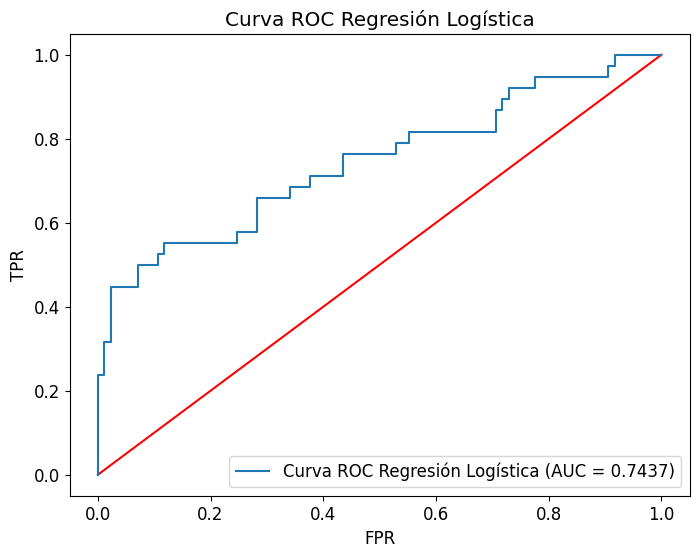

In [36]:
# Gráfica Curva ROC
plot_roc_curve(y_test, y_proba_test, 'Regresión Logística')

### Ejecutando con varios optimizadores y reguladores
Construiremos el modelo de Regresión logística nuevamente para el mismo conjunto de datos, pero esta vez, usa diferentes valores de <b>solver</b> y <b>regularization</b>. Con esto podemos hacer comparaciones de varios modelos hasta encontrar el más adecuado:

In [37]:
from sklearn import metrics

In [38]:
# Parametros: 
# C: Inverso de la fuerza de regularización; debe ser un flotador positivo. Al igual que en las máquinas de vectores de 
# soporte, los valores más pequeños especifican una regularización más fuerte.

solvers=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
Cs=[0.01,0.02,0.05,0.1]

for s in solvers:
    for c in Cs:
        LR = LogisticRegression(C=c, solver=s).fit(X_train,y_train)
        yhat = LR.predict(X_test)
        yhat_prob = LR.predict_proba(X_test)[:,1]
        print("Solver = "+s+", C = "+str(c)+
              " ->Accuracy : "+str(metrics.accuracy_score(y_test, yhat)) +
             " ->AUC : "+str(roc_auc_score(y_test, yhat_prob)))

Solver = newton-cg, C = 0.01 ->Accuracy : 0.6910569105691057 ->AUC : 0.7120743034055728
Solver = newton-cg, C = 0.02 ->Accuracy : 0.7073170731707317 ->AUC : 0.7173374613003096
Solver = newton-cg, C = 0.05 ->Accuracy : 0.7804878048780488 ->AUC : 0.7207430340557275
Solver = newton-cg, C = 0.1 ->Accuracy : 0.8130081300813008 ->AUC : 0.7244582043343654
Solver = lbfgs, C = 0.01 ->Accuracy : 0.6910569105691057 ->AUC : 0.7120743034055728
Solver = lbfgs, C = 0.02 ->Accuracy : 0.7073170731707317 ->AUC : 0.7173374613003096
Solver = lbfgs, C = 0.05 ->Accuracy : 0.7804878048780488 ->AUC : 0.7207430340557275
Solver = lbfgs, C = 0.1 ->Accuracy : 0.8130081300813008 ->AUC : 0.7244582043343654
Solver = liblinear, C = 0.01 ->Accuracy : 0.6910569105691057 ->AUC : 0.7043343653250775
Solver = liblinear, C = 0.02 ->Accuracy : 0.7073170731707317 ->AUC : 0.7139318885448916
Solver = liblinear, C = 0.05 ->Accuracy : 0.7723577235772358 ->AUC : 0.7272445820433435
Solver = liblinear, C = 0.1 ->Accuracy : 0.8130081

In [39]:
max_accuracy = metrics.accuracy_score(y_test, yhat)

In [40]:
# max = tr(metrics.accuracy_score(y_test, yhat))
# max_accuracy = max(metrics.accuracy_score(y_test, yhat))
print("Precisión máxima:", max_accuracy)

Precisión máxima: 0.8130081300813008


In [41]:
## Probando Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [43]:
clf = DecisionTreeClassifier(random_state = 2)
model_dt = clf.fit(X_train, y_train) 

In [44]:
pred = model_dt.predict(X_test)

In [45]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.55      0.64        85
           1       0.38      0.61      0.46        38

    accuracy                           0.57       123
   macro avg       0.57      0.58      0.55       123
weighted avg       0.64      0.57      0.59       123



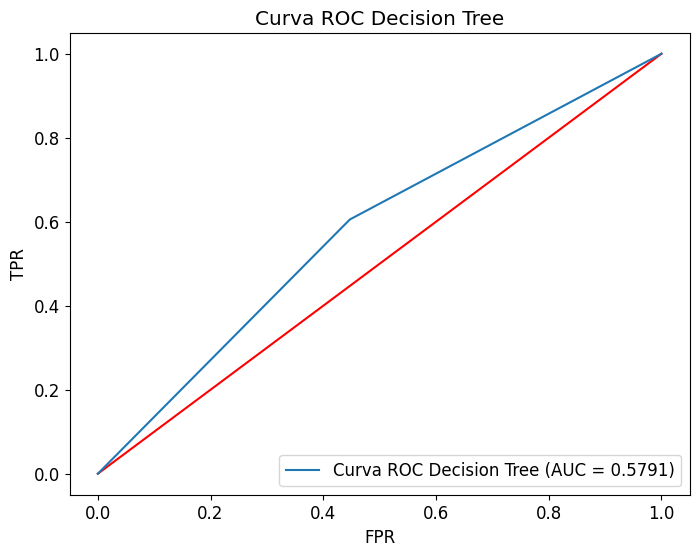

In [46]:
y_proba_test = model_dt.predict_proba(X_test)[:,1]
plot_roc_curve(y_test, y_proba_test, 'Decision Tree')

In [47]:
## Probando Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier(max_depth = 25, random_state = 0)
model_rfc = rfc.fit(X_train, y_train)
pred_rfc = model_rfc.predict(X_test)

In [50]:
print(metrics.classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85        85
           1       0.67      0.58      0.62        38

    accuracy                           0.78       123
   macro avg       0.74      0.72      0.73       123
weighted avg       0.77      0.78      0.78       123



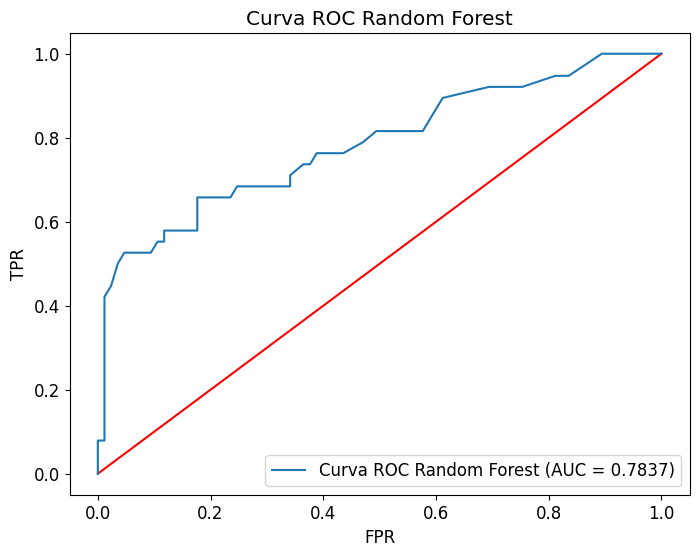

In [51]:
y_proba_test = model_rfc.predict_proba(X_test)[:,1]
plot_roc_curve(y_test, y_proba_test, 'Random Forest')

### Solidificando

In [60]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               123 non-null    float64
 1   ApplicantIncome          123 non-null    float64
 2   CoapplicantIncome        123 non-null    float64
 3   LoanAmount               123 non-null    float64
 4   Loan_Amount_Term         123 non-null    float64
 5   Credit_History           123 non-null    float64
 6   Gender_Male              123 non-null    float64
 7   Married_Yes              123 non-null    float64
 8   Education_Not Graduate   123 non-null    float64
 9   Self_Employed_Yes        123 non-null    float64
 10  Property_Area_Semiurban  123 non-null    float64
 11  Property_Area_Urban      123 non-null    float64
 12  TotalIncome              123 non-null    float64
 13  TotalIncomeByPerson      123 non-null    float64
 14  Cuota                    1

In [56]:
pred_rfc

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [65]:
cantidad_total = len(pred_rfc)
cantidad_aprobados = sum(pred_rfc == 1)
cantidad_no_aprobados = sum(pred_rfc == 0)

porcentaje_aprobados = round((cantidad_aprobados / cantidad_total)*100, 2)
porcentaje_no_aprobados = round((cantidad_no_aprobados / cantidad_total)*100, 2)

print("Porcentaje de personas que aprueban el prestamo:", porcentaje_aprobados, "%")
print("Porcentaje de personas que no aprueban el prestamo:", porcentaje_no_aprobados, "%")

Porcentaje de personas que aprueban el prestamo: 26.83 %
Porcentaje de personas que no aprueban el prestamo: 73.17 %


In [66]:
aciertos = sum(pred_rfc == y_test)
porcentaje_aciertos = round((aciertos/cantidad_total)*100)

print("Porcentaje total de aciertos:", porcentaje_aciertos, "%")

Porcentaje total de aciertos: 78 %


In [64]:
############################################################